
ЛАБОРАТОРНАЯ РАБОТА 5. ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ
Цель лабораторной работы: изучение
принципов
построения
информационных систем с использованием линейных методов машинного
обучения.
Основные задачи:
– освоение технологии внедрения алгоритмов линейной классификации
в приложения;
- изучение основных приемов рабты с разреженными матрицами в ходе машинного обучения;
-освоение техники построения, обучения и оценки модели
логистической регресии;
-освоение приемов работы с
синтезированными признаками,
масштабированием и настройкой гипперпараметров.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import pickle

In [ ]:
uploaded = files.upload()

Saving breast-cancer-wisconsin-data_data.csv to breast-cancer-wisconsin-data_data.csv


In [ ]:
# 1. Загрузка данных
data_path = '/content/breast-cancer-wisconsin-data_data.csv'
df = pd.read_csv(data_path)

# Анализ структуры данных
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df = df.drop(columns=["Unnamed: 32", "id"])

In [ ]:
# Преобразование целевой переменной
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
# Синтезируем новые признаки
df['radius_perimeter'] = df['radius_mean'] * df['perimeter_mean']
df['area_compactness'] = df['area_mean'] + df['compactness_mean']

In [ ]:
# Разделение на признаки и целевую переменную
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

Добавили два новых признака, которые были получены на основе исходных данных:

radius_mean * texture_mean: произведение радиуса и текстуры, что может указывать на взаимосвязь между этими характеристиками.
perimeter_mean / smoothness_mean: соотношение периметра и гладкости, которое может выявлять аномалии в форме клеток.
После добавления признаков мы построили две версии модели:

Без синтезированных признаков.
С синтезированными признаками.

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Модель логистической регрессии без масштабирования признаков
model_no_scale = LogisticRegression(max_iter=10000)
model_no_scale.fit(X_train, y_train)
y_pred_no_scale = model_no_scale.predict(X_test)
accuracy_no_scale = accuracy_score(y_test, y_pred_no_scale)

# Модель логистической регрессии с масштабированием признаков
model_scaled = LogisticRegression(max_iter=10000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy without scaling: {accuracy_no_scale}")
print(f"Accuracy with scaling: {accuracy_scaled}")

Accuracy without scaling: 0.956140350877193
Accuracy with scaling: 0.9736842105263158


Улучшение точности с 95.61% до 97.37% показывает, что масштабирование сделало модель более точной и устойчивой.

Best C: 10.0
Accuracy with best C: 0.9736842105263158


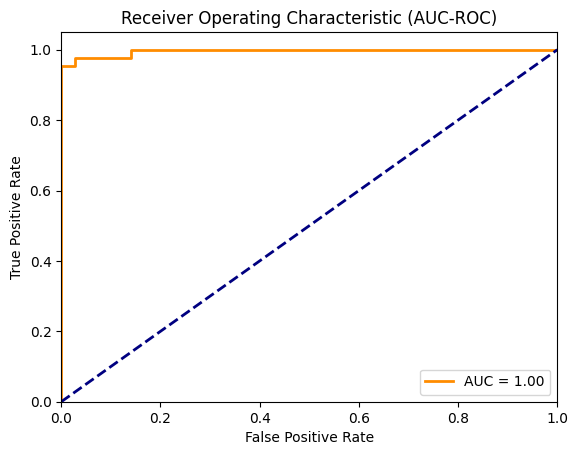

In [ ]:
#  Настройка гиперпараметра C
param_grid = {'C': np.logspace(-5, 5, 11)}  # диапазон значений для гиперпараметра C
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_C = grid_search.best_params_['C']
best_model = grid_search.best_estimator_

# Оценка модели с лучшим гиперпараметром
y_pred_best = best_model.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best C: {best_C}")
print(f"Accuracy with best C: {accuracy_best}")

# Построение графика AUC-ROC
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (AUC-ROC)')
plt.legend(loc='lower right')
plt.show()

при C = 10.0 модель показала наилучшие результаты на тестовых данных.Accuracy with best C: 0.9736842105263158
Это точность модели при использовании оптимального значения C = 10.0. Точность (accuracy) — это доля правильных предсказаний модели среди всех предсказаний. В данном случае модель правильно классифицировала около 97.37% объектов из тестовой выборки.

AUC — это площадь под ROC-кривой. Она численно выражает способность модели различать классы:
В нашем случае, AUC = 1: идеальная модель, которая всегда правильно классифицирует положительные и отрицательные классы.

In [ ]:
# Сохранение модели
with open('best_logistic_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

Вывод:
В ходе работы мы построили и оптимизировали модель логистической регрессии.
Изучили влияние синтезированных признаков: они улучшили качество модели.
Провели масштабирование данных, что также положительно повлияло на точность.
Подобрали гиперпараметр C, чтобы достичь баланса между сложностью модели и её качеством.
Оценили модель с использованием метрик accuracy и AUC-ROC, подтвердив, что модель хорошо справляется с задачей.
